In [5]:
import os
import time
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import normalize
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.fft import fft, fftfreq, ifft
import scipy
from scipy.fftpack import fft
from scipy.fftpack import dct
from scipy import fftpack
from scipy import signal
from scipy.signal import chirp
import csv
from sklearn.model_selection import cross_val_score
from scipy.signal import filtfilt
from scipy.signal import lfilter
from scipy import stats
from scipy.signal import butter, lfilter, lfilter_zi, normalize
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, Conv2D, Dropout, Activation, MaxPool1D, MaxPool2D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta
import plotly.graph_objs as go
from matplotlib.pyplot import cm
from tensorflow.keras.models import Model
import numpy as np
import keras
import h5py
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

In [6]:
Channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

In [7]:
total_channels = 14
total_Person = 23 # This must be 23 as we have 23 subjects. 
total_Stimuli = 18

from PIL import Image
import imageio

allStimuliData = []

for PersonCount in range(total_Person):
    for index in range(total_Stimuli):
        for channel in Channels:
            img = cv2.imread('Spectograms/P' + str(PersonCount + 1) + '_S' + str(index + 1) + '_' + channel + '.jpg')
            img = cv2.resize(img, (100, 120))
            img = img/255
            allStimuliData.append(img)

allStimuliData = np.array(allStimuliData)
allStimuliData.shape


(5796, 120, 100, 3)

In [8]:
#This will be used to Train CNN model.

#Class Distribution of Self assesment ratings for Arousal, Valence and Dominance
ratings = pd.read_csv('Dataset/Results/AllRatings.csv')
AllRatings = pd.DataFrame(ratings)

Arousal = []
Valence = []
Dominance = []

ArousalCountz = 0
ArousalCountone = 0

ValenceCountz = 0
ValenceCountone = 0

DominanceCountz = 0
DominanceCountone = 0

count = total_Person*total_Stimuli

values = AllRatings['Arousal']
for i in range(count):
    if values[i] < 2.5:
        for j in range(14): # As each 14 channel co-responds to 1 result for 1 stimuli, we are assigning same value for all the channel for each stimuli singals.
            Arousal.append([0]) # uninterested/bored
            ArousalCountz = ArousalCountz+1
    else:
        for j in range(14): # As each 14 channel co-responds to 1 result for 1 stimuli, we are assigning same value for all the channel for each stimuli singals.
            Arousal.append([1]) # excited/alert
            ArousalCountone = ArousalCountone+1
    
values = AllRatings['Valence']
for i in range(count):
    if values[i] < 2.5:
        for j in range(14): # As each 14 channel co-responds to 1 result for 1 stimuli, we are assigning same value for all the channel for each stimuli singals.
            Valence.append([0]) # unpleasant/stressed
            ValenceCountz = ValenceCountz+1
    else:
        for j in range(14): # As each 14 channel co-responds to 1 result for 1 stimuli, we are assigning same value for all the channel for each stimuli singals.
            Valence.append([1]) # happy/elated
            ValenceCountone = ValenceCountone+1

        
values = AllRatings['Dominance']
for i in range(count):
    if values[i] < 2.5:
        for j in range(14): # As each 14 channel co responds to 1 result, we are assigning same value for all the channel for each stimuli singals.
            Dominance.append([0]) # helpless/Without Control
            DominanceCountz = DominanceCountz+1
    else:
        for j in range(14): # As each 14 channel co responds to 1 result, we are assigning same value for all the channel for each stimuli singals.
            Dominance.append([1]) # Empowered
            DominanceCountone = DominanceCountone+1

In [19]:
arousal = np.array(Arousal)
valance = np.array(Valence)
dominance = np.array(Dominance)
print(arousal.shape, valance.shape, dominance.shape)

(5796, 1) (5796, 1) (5796, 1)


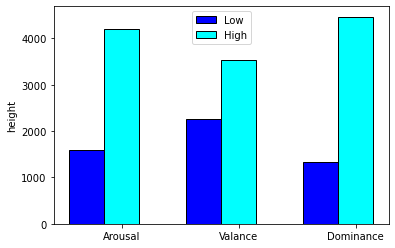

In [20]:
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = [ArousalCountz, ValenceCountz, DominanceCountz]
 
# Choose the height of the cyan bars
bars2 = [ArousalCountone, ValenceCountone, DominanceCountone]
 
# Choose the height of the error bars (bars1)
yer1 = [0.5, 0.4, 0.5]
 
# Choose the height of the error bars (bars2)
yer2 = [1, 0.7, 1]
 

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='Low')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='High')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['Arousal', 'Valance', 'Dominance'])
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()

In [34]:
#Arousal

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(2,2),padding='same', activation='relu', input_shape=[120,100, 3]))

model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(units=630 , activation='relu', name='my_dense'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 120, 100, 32)      416       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 120, 100, 32)      4128      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 120, 100, 64)      8256      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 60, 50, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 60, 50, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 192000)            0         
_________________________________________________________________
my_dense (Dense)             (None, 630)              

In [35]:
from keras.models import Model
layer_name='my_dense'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

intermediate_layer_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27_input (InputLayer) [(None, 120, 100, 3)]     0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 120, 100, 32)      416       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 120, 100, 32)      4128      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 120, 100, 64)      8256      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 60, 50, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 60, 50, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 192000)            0   

In [36]:
from keras.optimizers import Adam, Adadelta, RMSprop

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# fit network

history = model.fit(allStimuliData, arousal, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
182/182 [==============================] - 224s 1s/step - loss: 1.7183 - accuracy: 0.6755
Epoch 2/30
182/182 [==============================] - 224s 1s/step - loss: 0.5769 - accuracy: 0.7406
Epoch 3/30
182/182 [==============================] - 234s 1s/step - loss: 0.4793 - accuracy: 0.7787
Epoch 4/30
182/182 [==============================] - 220s 1s/step - loss: 0.4056 - accuracy: 0.8261
Epoch 5/30
182/182 [==============================] - 220s 1s/step - loss: 0.3224 - accuracy: 0.8645
Epoch 6/30
182/182 [==============================] - 235s 1s/step - loss: 0.2675 - accuracy: 0.8875
Epoch 7/30
182/182 [==============================] - 230s 1s/step - loss: 0.2255 - accuracy: 0.9101
Epoch 8/30
182/182 [==============================] - 228s 1s/step - loss: 0.2012 - accuracy: 0.9196
Epoch 9/30
182/182 [==============================] - 228s 1s/step - loss: 0.1569 - accuracy: 0.9383
Epoch 10/30
182/182 [==============================] - 225s 1s/step - loss: 0.1348 - accura

In [70]:
#Getting the trainned layer from the the previous CNN model.
feature_vector = intermediate_layer_model.predict(allStimuliData) 
feature_vector = pd.DataFrame(data=feature_vector)
print(feature_vector.shape)

(5796, 630)


In [71]:
# These are the features we have got from the dense layer (unit = 630)
feature_vector

,0,1,2,3,4,5,6,7,8,9,...,620,621,622,623,624,625,626,627,628,629
0,3.346487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.580889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.013372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.947896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.427404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14.312762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.669977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.182760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.084344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17.158424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,13.938763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14.649897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5792,14.403699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14.366327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5793,11.744981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16.016239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5794,15.353786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17.355055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
# You can check the file named 'Feature_Vector_Arousal.csv'
feature_vector.to_csv('Feature_Vector_Arousal.csv')

In [84]:
import xgboost
from xgboost import XGBClassifier

xgbmodel = XGBClassifier(max_depth=3,
                      objective='binary:logistic',
                      n_estimators= 1000,
                      learning_rate = 0.05,
                      random_state=0)

# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(feature_vector, arousal, test_size=0.3, random_state=0, stratify = arousal)

xgbmodel.fit(X_train, y_train)
score = xgbmodel.score(X_test, y_test)*100
print('Accuracy -> %.3f' % (score) +'%')


[19:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy -> 99.712%


In [86]:
# evaluate model
print("Arousal : Results ->")
accuracy = xgbmodel.score(X_test, y_test)
acc = accuracy*100
print('Overall Accuracy -> %.3f' % (acc) +'%')


#ROC (Receiver operating characteristic) of Arousal
from sklearn.metrics import roc_curve
y_preds = xgbmodel.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)


# Getting the right threshold
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
threshold_value = float(ideal_roc_thresh['thresholds'])
print("Ideal threshold is: ", threshold_value) 


#Now use this threshold value in the confusion matrix to visualize the balance between tp, fp, fp, and fn
#Area under the curve (AUC) for ROC plot can be used to understand how well a classifier is performing. % chance that the model can distinguish between positive and negative classes.

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)*100
print('Area under curve, AUC = %.3f' % (auc_value) +'%')

print("Confusion Matrix")
arousal_pred = (xgbmodel.predict(X_test)).astype("int32") # Setting a threshold.
cm = confusion_matrix(y_test, arousal_pred)
print(cm)

Arousal : Results ->
Overall Accuracy -> 99.712%
Ideal threshold is:  1.0
Area under curve, AUC = 99.607%
Confusion Matrix
[[ 476    3]
 [   2 1258]]


In [99]:
Results_Summary = {
    'Expected' : y_test[:,0],
    'Predicted' : arousal_pred
}
pd.DataFrame(Results_Summary)

,Expected,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
1734,1,1
1735,1,1
1736,1,1
1737,1,1


In [115]:
# You can check the file named 'Arousal_Predictions.csv'
Results_Summary = pd.DataFrame(Results_Summary)
Results_Summary.to_csv('Arousal_Predictions.csv')

In [ ]:
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = [10, 9, 2]
 
# Choose the height of the cyan bars
bars2 = [10.8, 9.5, 4.5]
 
# Choose the height of the error bars (bars1)
yer1 = [0.5, 0.4, 0.5]
 
# Choose the height of the error bars (bars2)
yer2 = [1, 0.7, 1]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='poacee')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='sorgho')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C'])
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()
